In [1]:
# Imports
%load_ext autoreload
%autoreload 2

from os.path import exists
from pathlib import Path

import math

import numpy as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn # Includes all modules, nn.Linear, nn.Conv2d, BatchNorm etc
import torch.optim as optim # Is used for otimization algorithms such as Adam, SGD ...
from torch.utils.data import DataLoader # Helps with managing datasets in mini batches
from torch.utils.data import Dataset

import torchvision
import torchvision.datasets as datasets # Has standard datasets
import torchvision.transforms as transforms # Transformations to be used on images
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torchvision.models import vgg19

from itertools import chain
from PIL import Image

from model import Generator, Discriminator # Models
from loss import VGGContentLoss
from datahandler import DataHandler
from modelhandler import ModelHandler
from utils import display_image, save_result_images
from train import train_loop
import config

In [2]:
print("cuda is available: " + str(torch.cuda.is_available()))
device = config.DEVICE
print("Device is set to: " + str(config.DEVICE))

cuda is available: True
Device is set to: cuda


Text(0.5, 1.0, 'High res (96 x 96 px)')

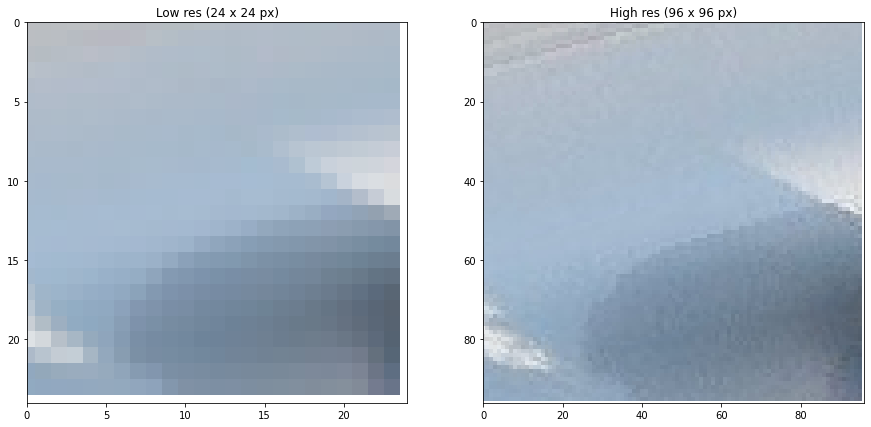

In [3]:
# The Dataset constructor has a transform attribute, we will cover it below. Just use this for now:
high_res_size = 96
low_res_size = 24

example_dataset = DataHandler("./dataset/", high_res_size ,low_res_size);
fig, axis = plt.subplots(1,2, figsize=(15,15))
some_random_index = 3
high_res_image_tensor, low_res_image_tensor = example_dataset[some_random_index]
display_image(axis[0], low_res_image_tensor)
axis[0].set_title('Low res (' + str(low_res_size) + ' x ' + str(low_res_size) + ' px)')
display_image(axis[1], high_res_image_tensor, reverse_normalization = True)
axis[1].set_title('High res (' + str(high_res_size) + ' x ' + str(high_res_size) + ' px)')

In [4]:
# Initialize models (with ModelHandler)
model_handler = ModelHandler()
generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict = model_handler.load_models()

# Initialize data
datahandler = DataHandler("./dataset/", config_dict['HIGH_RES_SIZE'] ,config_dict['LOW_RES_SIZE']);
train_dataloader = DataLoader(datahandler, batch_size=config_dict['BATCH_SIZE'], shuffle=True)

Load procedure initialized..
Enter stem of path (leave empty for new models): 
Loading models from scratch
high_res_size:           96
low_res_size:            24
scaling_factor:          2
batch_size:              32
num_epochs_train:        300
num_epochs_pretrain:     50
gen_lr:                  0.0001
gen_lr_pretrain:         0.001
disc_lr:                 0.0001
use_inception_blocks:    False
pixel_weight:            0.1
content_weight:          1
adversarial_weight:      0.005


In [5]:
# TRAINING TIME!
# Generator training (Pretraining)
generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict = train_loop(train_dataloader, generator, discriminator,  disc_opti, gen_opti, gen_opti_pretrain, config_dict, adversarial=False)

# Adversarial training (Regular Training)
generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict = train_loop(train_dataloader, generator, discriminator,  disc_opti, gen_opti, gen_opti_pretrain, config_dict, adversarial=True)

##################
Starting GENERATOR training
##################


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/50][100/157]	Loss_G: 0.0610


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/50][100/157]	Loss_G: 0.0415


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/50][100/157]	Loss_G: 0.0391


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/50][100/157]	Loss_G: 0.0350


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/50][100/157]	Loss_G: 0.0318


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/50][100/157]	Loss_G: 0.0409


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/50][100/157]	Loss_G: 0.0339


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/50][100/157]	Loss_G: 0.0366


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/50][100/157]	Loss_G: 0.0454


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/50][100/157]	Loss_G: 0.0394


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/50][100/157]	Loss_G: 0.0435


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/50][100/157]	Loss_G: 0.0374


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/50][100/157]	Loss_G: 0.0455


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/50][100/157]	Loss_G: 0.0346


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/50][100/157]	Loss_G: 0.0438


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/50][100/157]	Loss_G: 0.0323


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/50][100/157]	Loss_G: 0.0350


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/50][100/157]	Loss_G: 0.0289


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/50][100/157]	Loss_G: 0.0318


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/50][100/157]	Loss_G: 0.0381


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/50][100/157]	Loss_G: 0.0375


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/50][100/157]	Loss_G: 0.0327


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/50][100/157]	Loss_G: 0.0378


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/50][100/157]	Loss_G: 0.0362


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/50][100/157]	Loss_G: 0.0342


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/50][100/157]	Loss_G: 0.0403


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/50][100/157]	Loss_G: 0.0349


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/50][100/157]	Loss_G: 0.0282


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/50][100/157]	Loss_G: 0.0306


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/50][100/157]	Loss_G: 0.0365


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/50][100/157]	Loss_G: 0.0270


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/50][100/157]	Loss_G: 0.0327


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/50][100/157]	Loss_G: 0.0385


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/50][100/157]	Loss_G: 0.0320


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/50][100/157]	Loss_G: 0.0411


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/50][100/157]	Loss_G: 0.0414


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/50][100/157]	Loss_G: 0.0293


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/50][100/157]	Loss_G: 0.0314


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/50][100/157]	Loss_G: 0.0340


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/50][100/157]	Loss_G: 0.0457


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/50][100/157]	Loss_G: 0.0231


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/50][100/157]	Loss_G: 0.0360


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/50][100/157]	Loss_G: 0.0447


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/50][100/157]	Loss_G: 0.0317


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/50][100/157]	Loss_G: 0.0276


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/50][100/157]	Loss_G: 0.0288


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/50][100/157]	Loss_G: 0.0409


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/50][100/157]	Loss_G: 0.0434


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/50][100/157]	Loss_G: 0.0279


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/50][100/157]	Loss_G: 0.0396
##################
Starting ADVERSARIAL training
##################


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/300][100/157]	Loss_D: 0.0300	Loss_G: 1.6308	D(x): 2.5123	D(G(z)): -3.8247 / -3.4042


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/300][100/157]	Loss_D: 0.0017	Loss_G: 1.5049	D(x): 4.6310	D(G(z)): -5.9044 / -5.8715
[Memory increase alert] If this is a reoccuring print statement. Program might be subject to memory leak!
Current memory is: 506231296


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/300][100/157]	Loss_D: 0.0002	Loss_G: 1.5206	D(x): 5.1631	D(G(z)): -5.8892 / -5.5801


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/300][100/157]	Loss_D: 0.0000	Loss_G: 1.6627	D(x): 3.1011	D(G(z)): -11.8122 / -11.8194


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/300][100/157]	Loss_D: 0.0309	Loss_G: 1.5021	D(x): 2.7530	D(G(z)): -9.2834 / -9.8011


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4386	D(x): 4.6217	D(G(z)): -11.4262 / -11.8086


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5711	D(x): 2.2451	D(G(z)): -13.4634 / -12.9876


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/300][100/157]	Loss_D: 0.0007	Loss_G: 1.7013	D(x): 1.2496	D(G(z)): -13.8716 / -13.9944


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/300][100/157]	Loss_D: 0.2648	Loss_G: 1.5093	D(x): -2.5310	D(G(z)): -10.5652 / -10.0836


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/300][100/157]	Loss_D: 0.5662	Loss_G: 1.3207	D(x): -12.9584	D(G(z)): -19.4697 / -18.4638


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/300][100/157]	Loss_D: 0.0204	Loss_G: 1.3464	D(x): 0.0207	D(G(z)): -12.3868 / -12.2500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/300][100/157]	Loss_D: 0.0002	Loss_G: 1.4814	D(x): 5.8387	D(G(z)): -11.1268 / -12.2221


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4549	D(x): 2.1297	D(G(z)): -12.7015 / -13.5561


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/300][100/157]	Loss_D: 0.0114	Loss_G: 1.6498	D(x): -2.2955	D(G(z)): -12.1717 / -12.1859


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/300][100/157]	Loss_D: 0.0120	Loss_G: 1.3374	D(x): -0.7509	D(G(z)): -9.8611 / -10.5711


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/300][100/157]	Loss_D: 0.0007	Loss_G: 1.7806	D(x): -1.3427	D(G(z)): -13.6089 / -18.4405


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/300][100/157]	Loss_D: 0.0001	Loss_G: 1.2689	D(x): 2.8499	D(G(z)): -9.4334 / -9.2269


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/300][100/157]	Loss_D: 0.0061	Loss_G: 1.5154	D(x): 2.0313	D(G(z)): -9.8293 / -10.5342


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/300][100/157]	Loss_D: 1.3595	Loss_G: 1.6395	D(x): 7.0524	D(G(z)): 6.1453 / 4.6071


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/300][100/157]	Loss_D: 0.0030	Loss_G: 1.3290	D(x): 0.1505	D(G(z)): -7.4006 / -9.3403


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/300][100/157]	Loss_D: 0.0044	Loss_G: 1.3916	D(x): 0.3561	D(G(z)): -8.4931 / -8.7821


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/300][100/157]	Loss_D: 0.0018	Loss_G: 1.5037	D(x): -5.4446	D(G(z)): -13.8537 / -16.7889


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/300][100/157]	Loss_D: 0.0055	Loss_G: 1.3237	D(x): -5.3734	D(G(z)): -13.2404 / -14.5929


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/300][100/157]	Loss_D: 0.0013	Loss_G: 1.3816	D(x): 6.9989	D(G(z)): -2.2271 / -2.7332


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/300][100/157]	Loss_D: 0.0439	Loss_G: 1.5431	D(x): 10.3790	D(G(z)): 4.5569 / 8.2966


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/300][100/157]	Loss_D: 0.0017	Loss_G: 1.5700	D(x): 0.4594	D(G(z)): -8.6429 / -7.6705


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/300][100/157]	Loss_D: 0.0618	Loss_G: 1.5572	D(x): 2.2512	D(G(z)): -4.8910 / -4.5465


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/300][100/157]	Loss_D: 0.0042	Loss_G: 1.3138	D(x): -8.9090	D(G(z)): -17.9181 / -18.2812


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/300][100/157]	Loss_D: 0.2689	Loss_G: 1.2413	D(x): -18.6024	D(G(z)): -25.5095 / -16.2737


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/300][100/157]	Loss_D: 0.0016	Loss_G: 1.3948	D(x): -2.5860	D(G(z)): -11.4489 / -11.2628


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/300][100/157]	Loss_D: 0.1510	Loss_G: 1.2691	D(x): -1.0030	D(G(z)): -6.8477 / -6.3559


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/300][100/157]	Loss_D: 0.1082	Loss_G: 1.5052	D(x): 12.2752	D(G(z)): 7.2263 / -2.7002


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/300][100/157]	Loss_D: 0.0020	Loss_G: 1.4610	D(x): 8.8536	D(G(z)): 1.0605 / 0.6323


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4312	D(x): 11.0567	D(G(z)): -7.2158 / -8.8031


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/300][100/157]	Loss_D: 0.0351	Loss_G: 1.4360	D(x): -3.7854	D(G(z)): -15.1175 / -15.9464


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/300][100/157]	Loss_D: 0.0144	Loss_G: 1.3102	D(x): 1.6032	D(G(z)): -6.4985 / -4.6740


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/300][100/157]	Loss_D: 0.0054	Loss_G: 1.5924	D(x): 3.9467	D(G(z)): -4.0137 / -4.1132


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/300][100/157]	Loss_D: 0.0042	Loss_G: 1.3197	D(x): 1.5842	D(G(z)): -9.0777 / -9.8627


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/300][100/157]	Loss_D: 0.1525	Loss_G: 1.6417	D(x): 3.0798	D(G(z)): -1.0804 / -3.7252


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/300][100/157]	Loss_D: 0.0050	Loss_G: 1.3942	D(x): -5.3901	D(G(z)): -16.2167 / -11.0233


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/300][100/157]	Loss_D: 0.0177	Loss_G: 1.4914	D(x): 1.7049	D(G(z)): -3.7305 / -5.6000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/300][100/157]	Loss_D: 0.0009	Loss_G: 1.5009	D(x): -2.3696	D(G(z)): -11.6490 / -12.9291


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/300][100/157]	Loss_D: 0.0155	Loss_G: 1.4430	D(x): -10.4521	D(G(z)): -17.5066 / -17.6642


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/300][100/157]	Loss_D: 0.0869	Loss_G: 1.4727	D(x): -6.2237	D(G(z)): -13.7722 / -11.4134


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/300][100/157]	Loss_D: 0.0412	Loss_G: 1.5623	D(x): 5.0880	D(G(z)): -1.5717 / -1.3378


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/300][100/157]	Loss_D: 0.0030	Loss_G: 1.4235	D(x): 4.7995	D(G(z)): -5.5452 / -5.8125


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/300][100/157]	Loss_D: 0.0011	Loss_G: 1.5310	D(x): 5.7974	D(G(z)): -3.8783 / -7.4555


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/300][100/157]	Loss_D: 0.0272	Loss_G: 1.5252	D(x): 9.9413	D(G(z)): 3.7232 / 5.3972


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/300][100/157]	Loss_D: 0.0123	Loss_G: 1.3049	D(x): -11.9908	D(G(z)): -18.1093 / -21.2939


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/300][100/157]	Loss_D: 0.0017	Loss_G: 1.5800	D(x): -5.5428	D(G(z)): -13.9607 / -16.1151


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[51/300][100/157]	Loss_D: 3.1476	Loss_G: 1.4763	D(x): 23.9979	D(G(z)): 23.6303 / 24.3145


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[52/300][100/157]	Loss_D: 0.0068	Loss_G: 1.4776	D(x): 15.4326	D(G(z)): 8.0862 / 6.8314


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[53/300][100/157]	Loss_D: 0.2496	Loss_G: 1.5833	D(x): 7.6427	D(G(z)): 0.9701 / -4.6454


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[54/300][100/157]	Loss_D: 0.0074	Loss_G: 1.3850	D(x): -3.5165	D(G(z)): -12.1190 / -10.3113


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[55/300][100/157]	Loss_D: 0.0013	Loss_G: 1.6730	D(x): 7.5126	D(G(z)): -0.8512 / 2.7293


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[56/300][100/157]	Loss_D: 0.3750	Loss_G: 1.4237	D(x): -0.1604	D(G(z)): -3.3925 / -1.1436


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[57/300][100/157]	Loss_D: 0.0001	Loss_G: 1.5095	D(x): -6.4948	D(G(z)): -19.3426 / -19.0139


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[58/300][100/157]	Loss_D: 0.0025	Loss_G: 1.4739	D(x): -0.6539	D(G(z)): -11.6821 / -14.2033


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[59/300][100/157]	Loss_D: 0.3037	Loss_G: 1.3461	D(x): 17.9114	D(G(z)): 13.1292 / 12.5255


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[60/300][100/157]	Loss_D: 0.0010	Loss_G: 1.4531	D(x): -0.6010	D(G(z)): -8.9316 / -6.5105


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[61/300][100/157]	Loss_D: 0.0093	Loss_G: 1.4753	D(x): 6.8106	D(G(z)): 0.2254 / 6.3582


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[62/300][100/157]	Loss_D: 0.0036	Loss_G: 1.3890	D(x): -3.5474	D(G(z)): -12.0691 / -13.0236


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[63/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3924	D(x): -5.2108	D(G(z)): -23.5617 / -18.1140


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[64/300][100/157]	Loss_D: 0.0319	Loss_G: 1.4406	D(x): -1.8697	D(G(z)): -7.8512 / -8.8088


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[65/300][100/157]	Loss_D: 0.0010	Loss_G: 1.4237	D(x): 1.5361	D(G(z)): -8.6176 / -12.0299


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[66/300][100/157]	Loss_D: 0.0006	Loss_G: 1.7733	D(x): 2.1357	D(G(z)): -7.2252 / -7.8433


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[67/300][100/157]	Loss_D: 0.0028	Loss_G: 1.5004	D(x): -13.1486	D(G(z)): -22.0603 / -24.0034


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[68/300][100/157]	Loss_D: 0.0009	Loss_G: 1.5255	D(x): 11.7687	D(G(z)): 3.1142 / 1.3045


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[69/300][100/157]	Loss_D: 0.3395	Loss_G: 1.3612	D(x): -1.4630	D(G(z)): -8.3232 / -10.1074


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[70/300][100/157]	Loss_D: 0.0003	Loss_G: 1.3457	D(x): -12.5616	D(G(z)): -25.6415 / -26.2553


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[71/300][100/157]	Loss_D: 0.3081	Loss_G: 1.5894	D(x): 8.2602	D(G(z)): 3.1791 / 0.9277


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[72/300][100/157]	Loss_D: 0.0251	Loss_G: 1.4243	D(x): 8.7523	D(G(z)): 2.2220 / 0.1501


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[73/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4528	D(x): -6.9301	D(G(z)): -23.9648 / -22.4309


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[74/300][100/157]	Loss_D: 0.0007	Loss_G: 1.6681	D(x): 23.3783	D(G(z)): 12.7379 / 12.8130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[75/300][100/157]	Loss_D: 0.2128	Loss_G: 1.6987	D(x): -7.7216	D(G(z)): -11.8149 / -12.0184


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[76/300][100/157]	Loss_D: 0.0157	Loss_G: 1.3480	D(x): 3.2113	D(G(z)): -3.3954 / -3.6514


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[77/300][100/157]	Loss_D: 0.0115	Loss_G: 1.5268	D(x): 17.1494	D(G(z)): 8.9511 / 7.9111


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[78/300][100/157]	Loss_D: 0.0752	Loss_G: 1.5506	D(x): -3.9206	D(G(z)): -11.4346 / -9.6585


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[79/300][100/157]	Loss_D: 0.2141	Loss_G: 1.3563	D(x): -20.1570	D(G(z)): -24.4681 / -21.6304


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[80/300][100/157]	Loss_D: 0.1243	Loss_G: 1.3641	D(x): -7.2203	D(G(z)): -10.7289 / -1.4742


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[81/300][100/157]	Loss_D: 0.0032	Loss_G: 1.3449	D(x): -7.1896	D(G(z)): -15.3602 / -15.9242


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[82/300][100/157]	Loss_D: 1.4274	Loss_G: 1.2252	D(x): -21.7532	D(G(z)): -23.7005 / -20.3608


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[83/300][100/157]	Loss_D: 0.0132	Loss_G: 1.5077	D(x): 6.0266	D(G(z)): 0.1694 / -1.4593


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[84/300][100/157]	Loss_D: 0.0111	Loss_G: 1.3390	D(x): 5.1617	D(G(z)): -1.6850 / -2.3390


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[85/300][100/157]	Loss_D: 0.1133	Loss_G: 1.3978	D(x): -10.8827	D(G(z)): -16.4997 / -14.9277


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[86/300][100/157]	Loss_D: 0.0035	Loss_G: 1.5159	D(x): -0.8183	D(G(z)): -8.5183 / -11.7071


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[87/300][100/157]	Loss_D: 0.0004	Loss_G: 1.4186	D(x): -3.7469	D(G(z)): -14.9674 / -16.1919


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[88/300][100/157]	Loss_D: 0.8162	Loss_G: 1.3568	D(x): 5.1154	D(G(z)): 3.1920 / 0.3098


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[89/300][100/157]	Loss_D: 0.0997	Loss_G: 1.1668	D(x): 11.5576	D(G(z)): 6.2320 / 5.8623


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[90/300][100/157]	Loss_D: 0.0094	Loss_G: 1.4939	D(x): 13.9164	D(G(z)): 5.8707 / 5.1609


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[91/300][100/157]	Loss_D: 0.0023	Loss_G: 1.7259	D(x): 4.4938	D(G(z)): -5.1738 / -8.2247


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[92/300][100/157]	Loss_D: 0.0013	Loss_G: 1.4850	D(x): 14.0498	D(G(z)): 4.3541 / 3.1976


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[93/300][100/157]	Loss_D: 0.0003	Loss_G: 1.5013	D(x): 3.0511	D(G(z)): -8.3057 / -9.7769


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[94/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5800	D(x): -9.5036	D(G(z)): -23.6013 / -21.8770


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[95/300][100/157]	Loss_D: 0.0074	Loss_G: 1.7539	D(x): 18.7017	D(G(z)): 11.9412 / 7.3186


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[96/300][100/157]	Loss_D: 0.0111	Loss_G: 1.4948	D(x): -2.4923	D(G(z)): -8.5911 / -8.9414


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[97/300][100/157]	Loss_D: 0.0001	Loss_G: 1.5439	D(x): 6.4777	D(G(z)): -5.0494 / -7.8226


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[98/300][100/157]	Loss_D: 0.0355	Loss_G: 1.3988	D(x): 5.2433	D(G(z)): -0.1874 / -1.9647


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[99/300][100/157]	Loss_D: 0.0069	Loss_G: 1.2980	D(x): -14.8499	D(G(z)): -21.6446 / -22.5531


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[100/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4716	D(x): 12.7446	D(G(z)): 0.6993 / -2.0095


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[101/300][100/157]	Loss_D: 0.1545	Loss_G: 1.5513	D(x): 7.4604	D(G(z)): 0.9513 / -1.3518


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[102/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3847	D(x): 19.2544	D(G(z)): -1.5887 / -3.7534


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[103/300][100/157]	Loss_D: 0.0428	Loss_G: 1.4223	D(x): -4.3421	D(G(z)): -9.6121 / -9.5908


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[104/300][100/157]	Loss_D: 0.3101	Loss_G: 1.3785	D(x): -3.5364	D(G(z)): -13.4564 / -18.0081


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[105/300][100/157]	Loss_D: 0.0022	Loss_G: 1.5310	D(x): 12.8733	D(G(z)): 3.2862 / 2.4751


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[106/300][100/157]	Loss_D: 0.0011	Loss_G: 1.5688	D(x): 10.1508	D(G(z)): 1.6699 / 2.2389


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[107/300][100/157]	Loss_D: 0.0006	Loss_G: 1.6094	D(x): 5.4526	D(G(z)): -3.7985 / -2.3850


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[108/300][100/157]	Loss_D: 0.0001	Loss_G: 1.6676	D(x): -4.7377	D(G(z)): -16.1551 / -15.4049


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[109/300][100/157]	Loss_D: 0.2183	Loss_G: 1.5753	D(x): -27.6402	D(G(z)): -32.1392 / -32.2142


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[110/300][100/157]	Loss_D: 0.4423	Loss_G: 1.5195	D(x): 19.9133	D(G(z)): 15.9188 / 10.2633


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[111/300][100/157]	Loss_D: 0.0224	Loss_G: 1.4011	D(x): 18.3699	D(G(z)): 12.1685 / 13.4234


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[112/300][100/157]	Loss_D: 0.1453	Loss_G: 1.5860	D(x): 29.6975	D(G(z)): 24.6140 / 23.2398


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[113/300][100/157]	Loss_D: 0.0179	Loss_G: 1.5849	D(x): -1.5726	D(G(z)): -9.8758 / -10.4686


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[114/300][100/157]	Loss_D: 0.0001	Loss_G: 1.3755	D(x): 3.9555	D(G(z)): -7.0061 / -16.6277


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[115/300][100/157]	Loss_D: 0.0927	Loss_G: 1.6807	D(x): 15.3378	D(G(z)): 9.9829 / 8.8244


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[116/300][100/157]	Loss_D: 0.1993	Loss_G: 1.6432	D(x): -13.7299	D(G(z)): -17.8229 / -23.5181


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[117/300][100/157]	Loss_D: 0.0216	Loss_G: 1.5305	D(x): -10.4798	D(G(z)): -18.9914 / -17.3284


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[118/300][100/157]	Loss_D: 2.0704	Loss_G: 1.6196	D(x): 3.5435	D(G(z)): 1.3364 / 0.7775


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[119/300][100/157]	Loss_D: 0.0009	Loss_G: 1.4806	D(x): -0.3312	D(G(z)): -10.2697 / -9.5198


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[120/300][100/157]	Loss_D: 0.2982	Loss_G: 1.3893	D(x): 19.0929	D(G(z)): 16.2423 / 14.0361


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[121/300][100/157]	Loss_D: 0.0001	Loss_G: 1.4296	D(x): 8.2291	D(G(z)): -7.0396 / -9.6490


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[122/300][100/157]	Loss_D: 0.0013	Loss_G: 1.3341	D(x): -0.1561	D(G(z)): -7.9580 / -7.1872


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[123/300][100/157]	Loss_D: 0.0003	Loss_G: 1.3989	D(x): 7.9504	D(G(z)): -1.5942 / -2.7423


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[124/300][100/157]	Loss_D: 0.0004	Loss_G: 1.3540	D(x): -2.0346	D(G(z)): -13.1669 / -14.7296


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[125/300][100/157]	Loss_D: 0.0216	Loss_G: 1.5244	D(x): -13.3647	D(G(z)): -22.2929 / -24.8820


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[126/300][100/157]	Loss_D: 0.2624	Loss_G: 1.4327	D(x): 20.4554	D(G(z)): 12.6773 / 4.5999


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[127/300][100/157]	Loss_D: 0.0009	Loss_G: 1.4917	D(x): -0.5053	D(G(z)): -9.3858 / -11.6187


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[128/300][100/157]	Loss_D: 0.0121	Loss_G: 1.4954	D(x): 12.8891	D(G(z)): 4.2913 / 5.8147


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[129/300][100/157]	Loss_D: 0.3632	Loss_G: 1.4564	D(x): -17.1263	D(G(z)): -28.5226 / -16.9059


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[130/300][100/157]	Loss_D: 0.0012	Loss_G: 1.4225	D(x): -9.1673	D(G(z)): -18.3918 / -16.6491


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[131/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4442	D(x): 10.6056	D(G(z)): -3.9795 / -16.5058


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[132/300][100/157]	Loss_D: 0.0034	Loss_G: 1.5137	D(x): 1.0593	D(G(z)): -6.5982 / -6.6798


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[133/300][100/157]	Loss_D: 0.1256	Loss_G: 1.2856	D(x): -14.9825	D(G(z)): -19.0286 / -19.2483


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[134/300][100/157]	Loss_D: 0.0012	Loss_G: 1.3734	D(x): 2.9158	D(G(z)): -5.2084 / -5.0925


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[135/300][100/157]	Loss_D: 0.0001	Loss_G: 1.4848	D(x): 8.2093	D(G(z)): -4.8714 / -5.6526


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[136/300][100/157]	Loss_D: 0.0505	Loss_G: 1.3295	D(x): 24.8673	D(G(z)): 18.3736 / 19.6978


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[137/300][100/157]	Loss_D: 0.0289	Loss_G: 1.3184	D(x): -10.7288	D(G(z)): -16.2435 / -16.2849


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[138/300][100/157]	Loss_D: 0.0038	Loss_G: 1.5423	D(x): 4.4966	D(G(z)): -3.3705 / -4.5466


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[139/300][100/157]	Loss_D: 0.0000	Loss_G: 1.6445	D(x): 29.9167	D(G(z)): 14.6031 / 7.9832


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[140/300][100/157]	Loss_D: 0.0162	Loss_G: 1.4248	D(x): -3.6467	D(G(z)): -9.1254 / -10.1556


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[141/300][100/157]	Loss_D: 0.0000	Loss_G: 1.7334	D(x): -1.1605	D(G(z)): -24.5567 / -23.6107


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[142/300][100/157]	Loss_D: 0.0010	Loss_G: 1.1189	D(x): -17.4126	D(G(z)): -28.3155 / -27.6041


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[143/300][100/157]	Loss_D: 0.0649	Loss_G: 1.3512	D(x): 1.2166	D(G(z)): -11.7036 / -21.6626


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[144/300][100/157]	Loss_D: 0.0024	Loss_G: 1.5215	D(x): 5.7281	D(G(z)): -3.1608 / -3.3469


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[145/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3993	D(x): 10.0532	D(G(z)): -6.1888 / -3.9835


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[146/300][100/157]	Loss_D: 0.0012	Loss_G: 1.4943	D(x): -15.2028	D(G(z)): -24.7716 / -27.3140


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[147/300][100/157]	Loss_D: 0.0063	Loss_G: 1.4728	D(x): 14.5808	D(G(z)): 8.1050 / 4.8312


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[148/300][100/157]	Loss_D: 0.0001	Loss_G: 1.5116	D(x): 19.8986	D(G(z)): 4.8596 / 6.7069


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[149/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5199	D(x): -4.8134	D(G(z)): -17.7806 / -12.7912


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[150/300][100/157]	Loss_D: 0.0538	Loss_G: 1.6229	D(x): -12.8842	D(G(z)): -18.8717 / -19.2860


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[151/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5046	D(x): 25.3703	D(G(z)): 9.2846 / 8.7912


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[152/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4752	D(x): 7.1536	D(G(z)): -8.5392 / -8.5228


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[153/300][100/157]	Loss_D: 0.0015	Loss_G: 1.5343	D(x): 11.4728	D(G(z)): 2.3872 / 2.5098


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[154/300][100/157]	Loss_D: 0.0330	Loss_G: 1.3616	D(x): 1.3351	D(G(z)): -4.9803 / -5.8711


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[155/300][100/157]	Loss_D: 0.0041	Loss_G: 1.5246	D(x): -8.6186	D(G(z)): -15.9841 / -16.2152


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[156/300][100/157]	Loss_D: 0.0024	Loss_G: 1.3343	D(x): 0.9873	D(G(z)): -9.2522 / -10.0816


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[157/300][100/157]	Loss_D: 0.2393	Loss_G: 1.4367	D(x): 4.4152	D(G(z)): -0.0423 / 0.4968


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[158/300][100/157]	Loss_D: 0.2620	Loss_G: 1.4163	D(x): 22.9978	D(G(z)): 19.4686 / 15.8078


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[159/300][100/157]	Loss_D: 0.0008	Loss_G: 1.4706	D(x): 3.0331	D(G(z)): -7.1095 / -6.9088


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[160/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4520	D(x): -4.1701	D(G(z)): -19.5736 / -21.6130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[161/300][100/157]	Loss_D: 0.0029	Loss_G: 1.3190	D(x): 3.2755	D(G(z)): -15.3916 / -14.8196


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[162/300][100/157]	Loss_D: 0.0009	Loss_G: 1.2876	D(x): -11.2987	D(G(z)): -19.9704 / -21.0062


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[163/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5812	D(x): 5.0060	D(G(z)): -13.5619 / -13.6729


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[164/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3652	D(x): 21.5634	D(G(z)): 3.3967 / -3.0190


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[165/300][100/157]	Loss_D: 0.0002	Loss_G: 1.5773	D(x): 16.2778	D(G(z)): 3.2276 / 5.2756


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[166/300][100/157]	Loss_D: 0.0065	Loss_G: 1.3507	D(x): 0.8872	D(G(z)): -5.6173 / -7.3915


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[167/300][100/157]	Loss_D: 0.0011	Loss_G: 1.3965	D(x): 22.6435	D(G(z)): 10.5935 / 10.8539


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[168/300][100/157]	Loss_D: 0.0003	Loss_G: 1.3675	D(x): -5.0007	D(G(z)): -18.0856 / -17.7988


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[169/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5262	D(x): 14.9456	D(G(z)): -0.3413 / -0.4390


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[170/300][100/157]	Loss_D: 0.0001	Loss_G: 1.3195	D(x): -9.4498	D(G(z)): -23.5742 / -23.8478


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[171/300][100/157]	Loss_D: 0.0009	Loss_G: 1.3750	D(x): -4.5109	D(G(z)): -13.8721 / -13.6446


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[172/300][100/157]	Loss_D: 0.0009	Loss_G: 1.4469	D(x): 1.9831	D(G(z)): -13.1241 / -7.3994


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[173/300][100/157]	Loss_D: 0.0004	Loss_G: 1.3235	D(x): 20.4419	D(G(z)): 6.5069 / 6.1195


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[174/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4898	D(x): 20.7229	D(G(z)): 2.9214 / 2.5858


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[175/300][100/157]	Loss_D: 0.0000	Loss_G: 1.6359	D(x): 3.5324	D(G(z)): -11.2087 / -13.1183


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[176/300][100/157]	Loss_D: 0.0077	Loss_G: 1.3654	D(x): 8.3973	D(G(z)): 0.4905 / 1.0795


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[177/300][100/157]	Loss_D: 0.0023	Loss_G: 1.4780	D(x): 16.4926	D(G(z)): 7.1177 / 4.2678


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[178/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5967	D(x): 4.6234	D(G(z)): -19.4513 / -19.8177


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[179/300][100/157]	Loss_D: 0.0021	Loss_G: 1.3738	D(x): -2.5871	D(G(z)): -12.5107 / -13.8523


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[180/300][100/157]	Loss_D: 0.0029	Loss_G: 1.4291	D(x): -1.2036	D(G(z)): -11.2585 / -11.0952


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[181/300][100/157]	Loss_D: 0.0270	Loss_G: 1.5885	D(x): -6.0999	D(G(z)): -11.4763 / -11.5616


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[182/300][100/157]	Loss_D: 0.0001	Loss_G: 1.3890	D(x): 21.0283	D(G(z)): 9.2939 / 8.5021


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[183/300][100/157]	Loss_D: 0.0261	Loss_G: 1.2557	D(x): 21.8495	D(G(z)): 15.9935 / 16.2842


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[184/300][100/157]	Loss_D: 0.0006	Loss_G: 1.4731	D(x): 1.9042	D(G(z)): -7.5200 / -9.5775


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[185/300][100/157]	Loss_D: 0.0007	Loss_G: 1.4112	D(x): 23.9331	D(G(z)): 13.2544 / 10.7150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[186/300][100/157]	Loss_D: 0.1582	Loss_G: 1.5543	D(x): 3.4265	D(G(z)): -3.5910 / -9.0424


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[187/300][100/157]	Loss_D: 0.0183	Loss_G: 1.3795	D(x): 32.0365	D(G(z)): 25.5317 / 24.9918


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[188/300][100/157]	Loss_D: 0.1422	Loss_G: 1.3835	D(x): -14.3787	D(G(z)): -20.3813 / -20.9020


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[189/300][100/157]	Loss_D: 0.0444	Loss_G: 1.6078	D(x): 1.4654	D(G(z)): -8.6017 / -8.2382


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[190/300][100/157]	Loss_D: 0.1148	Loss_G: 1.3206	D(x): -9.3257	D(G(z)): -15.1795 / -20.4997


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[191/300][100/157]	Loss_D: 1.0247	Loss_G: 1.4794	D(x): 5.0580	D(G(z)): 3.4621 / 3.2267


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[192/300][100/157]	Loss_D: 0.0018	Loss_G: 1.3560	D(x): 9.6998	D(G(z)): 1.0105 / 0.8283


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[193/300][100/157]	Loss_D: 0.4607	Loss_G: 1.1664	D(x): 0.5834	D(G(z)): -1.4619 / -0.3465


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[194/300][100/157]	Loss_D: 0.0007	Loss_G: 1.6329	D(x): 3.9873	D(G(z)): -6.0820 / -6.6519


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[195/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5940	D(x): 12.2868	D(G(z)): -5.1517 / -5.2132


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[196/300][100/157]	Loss_D: 0.5783	Loss_G: 1.5394	D(x): 32.1042	D(G(z)): 28.0872 / 21.8860


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[197/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5448	D(x): 3.7242	D(G(z)): -12.5793 / -13.1884


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[198/300][100/157]	Loss_D: 0.0001	Loss_G: 1.3195	D(x): -25.8570	D(G(z)): -37.5755 / -40.6632


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[199/300][100/157]	Loss_D: 0.0102	Loss_G: 1.5921	D(x): 27.1515	D(G(z)): 17.3797 / 16.5214


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[200/300][100/157]	Loss_D: 0.0007	Loss_G: 1.3960	D(x): -7.9285	D(G(z)): -17.7174 / -17.7029


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[201/300][100/157]	Loss_D: 0.0011	Loss_G: 1.4046	D(x): -9.1736	D(G(z)): -19.4943 / -17.8721


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[202/300][100/157]	Loss_D: 0.0000	Loss_G: 1.6056	D(x): 28.9989	D(G(z)): 11.4205 / 12.1643


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[203/300][100/157]	Loss_D: 0.0002	Loss_G: 1.2931	D(x): 13.9845	D(G(z)): 2.9343 / 2.5754


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[204/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3735	D(x): 8.8452	D(G(z)): -6.6258 / -6.7079


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[205/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5203	D(x): 27.7587	D(G(z)): 3.4766 / 3.3400


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[206/300][100/157]	Loss_D: 0.0643	Loss_G: 1.2939	D(x): 16.3825	D(G(z)): 10.1277 / 9.6604


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[207/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5008	D(x): 25.2096	D(G(z)): 11.3986 / 10.3947


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[208/300][100/157]	Loss_D: 0.0001	Loss_G: 1.3362	D(x): -11.6883	D(G(z)): -23.3535 / -23.5036


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[209/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5625	D(x): 8.8762	D(G(z)): -6.3498 / -6.3932


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[210/300][100/157]	Loss_D: 0.0001	Loss_G: 1.3325	D(x): 3.8991	D(G(z)): -10.4683 / -10.7621


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[211/300][100/157]	Loss_D: 0.0159	Loss_G: 1.4337	D(x): -0.8848	D(G(z)): -6.1243 / -6.4778


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[212/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5072	D(x): 25.8341	D(G(z)): 5.8080 / 5.1084


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[213/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5017	D(x): 19.8910	D(G(z)): -10.3282 / -9.5356


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[214/300][100/157]	Loss_D: 0.8507	Loss_G: 1.5687	D(x): -6.5967	D(G(z)): -8.1571 / -10.7997


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[215/300][100/157]	Loss_D: 0.0009	Loss_G: 1.4680	D(x): 7.7390	D(G(z)): -6.4081 / -6.5025


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[216/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5598	D(x): 3.9715	D(G(z)): -9.7490 / -12.5246


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[217/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5156	D(x): 14.6485	D(G(z)): -1.2111 / 0.4042


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[218/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3762	D(x): 8.7090	D(G(z)): -8.8364 / -8.9910


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[219/300][100/157]	Loss_D: 0.0035	Loss_G: 1.6275	D(x): 16.2121	D(G(z)): 7.4313 / 8.1303


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[220/300][100/157]	Loss_D: 0.0005	Loss_G: 1.3094	D(x): -4.4518	D(G(z)): -14.5235 / -14.4122


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[221/300][100/157]	Loss_D: 0.0009	Loss_G: 1.4323	D(x): 6.9795	D(G(z)): -2.4049 / -2.1951


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[222/300][100/157]	Loss_D: 0.0012	Loss_G: 1.3444	D(x): 10.4932	D(G(z)): 1.9681 / 1.8501


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[223/300][100/157]	Loss_D: 0.0013	Loss_G: 1.4018	D(x): 10.7832	D(G(z)): 1.7046 / 1.7579


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[224/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5471	D(x): -5.0865	D(G(z)): -19.3242 / -19.4169


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[225/300][100/157]	Loss_D: 0.0001	Loss_G: 1.6112	D(x): 15.9562	D(G(z)): 1.1499 / 1.1490


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[226/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3944	D(x): 28.4168	D(G(z)): 15.2209 / 15.6111


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[227/300][100/157]	Loss_D: 0.0002	Loss_G: 1.3912	D(x): 7.0247	D(G(z)): -6.5038 / -6.3003


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[228/300][100/157]	Loss_D: 0.0001	Loss_G: 1.5013	D(x): -14.1911	D(G(z)): -27.1194 / -27.0153


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[229/300][100/157]	Loss_D: 0.0004	Loss_G: 1.3520	D(x): 16.4762	D(G(z)): 0.4712 / -0.0937


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[230/300][100/157]	Loss_D: 0.0003	Loss_G: 1.6403	D(x): 20.0978	D(G(z)): 8.8213 / 11.1778


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[231/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4688	D(x): 4.2416	D(G(z)): -9.7281 / -10.8422


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[232/300][100/157]	Loss_D: 0.0001	Loss_G: 1.3641	D(x): 26.1795	D(G(z)): 14.3726 / 14.2647


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[233/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3310	D(x): 20.2294	D(G(z)): 2.7228 / 1.9193


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[234/300][100/157]	Loss_D: 0.0004	Loss_G: 1.5507	D(x): 21.3152	D(G(z)): 9.8734 / 10.0836


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[235/300][100/157]	Loss_D: 0.0006	Loss_G: 1.5500	D(x): 6.6153	D(G(z)): -2.4620 / -4.9779


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[236/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4599	D(x): 5.9799	D(G(z)): -12.6453 / -11.9918


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[237/300][100/157]	Loss_D: 0.0002	Loss_G: 1.2932	D(x): 13.0138	D(G(z)): 0.1560 / 0.4272


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[238/300][100/157]	Loss_D: 0.0085	Loss_G: 1.3402	D(x): -16.9242	D(G(z)): -26.2127 / -25.9638


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[239/300][100/157]	Loss_D: 0.0506	Loss_G: 1.3020	D(x): -6.8530	D(G(z)): -13.9398 / -14.1794


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[240/300][100/157]	Loss_D: 0.0141	Loss_G: 1.2314	D(x): -3.3523	D(G(z)): -9.4076 / -9.7318


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[241/300][100/157]	Loss_D: 0.0054	Loss_G: 1.3783	D(x): 12.5948	D(G(z)): 4.9883 / 4.4116


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[242/300][100/157]	Loss_D: 0.0559	Loss_G: 1.6509	D(x): -17.1763	D(G(z)): -22.0624 / -25.1820


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[243/300][100/157]	Loss_D: 0.0002	Loss_G: 1.3707	D(x): 24.9568	D(G(z)): 14.9076 / 15.0907


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[244/300][100/157]	Loss_D: 0.0001	Loss_G: 1.4907	D(x): 10.5935	D(G(z)): -3.8879 / -5.3458


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[245/300][100/157]	Loss_D: 0.0001	Loss_G: 1.4313	D(x): 14.2803	D(G(z)): 1.4891 / 1.4842


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[246/300][100/157]	Loss_D: 0.0259	Loss_G: 1.4627	D(x): 10.5643	D(G(z)): 5.5260 / 5.0417


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[247/300][100/157]	Loss_D: 0.0200	Loss_G: 1.2063	D(x): 16.8433	D(G(z)): 10.8848 / 6.7517


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[248/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3684	D(x): 10.9691	D(G(z)): -2.1218 / -2.3069


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[249/300][100/157]	Loss_D: 0.0040	Loss_G: 1.7517	D(x): 20.9231	D(G(z)): 12.4010 / 11.1848


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[250/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3827	D(x): 7.1027	D(G(z)): -7.4578 / -9.7774


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[251/300][100/157]	Loss_D: 0.0003	Loss_G: 1.4631	D(x): 12.0487	D(G(z)): 2.2470 / 0.8983


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[252/300][100/157]	Loss_D: 0.0205	Loss_G: 1.4803	D(x): -2.7807	D(G(z)): -13.9355 / -16.1212


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[253/300][100/157]	Loss_D: 0.1896	Loss_G: 1.4512	D(x): 6.4632	D(G(z)): 0.6978 / 0.4577


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[254/300][100/157]	Loss_D: 0.0005	Loss_G: 1.5144	D(x): 23.9157	D(G(z)): 12.1084 / 10.5856


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[255/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4356	D(x): 8.1260	D(G(z)): -4.9550 / -5.1799


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[256/300][100/157]	Loss_D: 0.0175	Loss_G: 1.2852	D(x): 10.5269	D(G(z)): 0.1857 / -0.5364


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[257/300][100/157]	Loss_D: 0.3460	Loss_G: 1.3313	D(x): 34.2602	D(G(z)): 30.1864 / 24.4481


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[258/300][100/157]	Loss_D: 0.1355	Loss_G: 1.1924	D(x): 7.9848	D(G(z)): 4.7136 / 2.8579


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[259/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5383	D(x): 3.0371	D(G(z)): -9.7137 / -12.0719


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[260/300][100/157]	Loss_D: 0.2207	Loss_G: 1.3140	D(x): -5.0468	D(G(z)): -10.0936 / -10.3107


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[261/300][100/157]	Loss_D: 0.0141	Loss_G: 1.3949	D(x): -7.4896	D(G(z)): -13.2637 / -13.7363


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[262/300][100/157]	Loss_D: 0.0132	Loss_G: 1.3001	D(x): 11.5289	D(G(z)): 5.4664 / 5.0830


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[263/300][100/157]	Loss_D: 0.0007	Loss_G: 1.4250	D(x): -19.5629	D(G(z)): -29.4515 / -29.4875


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[264/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4337	D(x): -10.1255	D(G(z)): -31.5534 / -32.3116


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[265/300][100/157]	Loss_D: 0.0045	Loss_G: 1.1958	D(x): 31.7736	D(G(z)): 22.8205 / 23.9562


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[266/300][100/157]	Loss_D: 0.0072	Loss_G: 1.5266	D(x): -7.6350	D(G(z)): -14.6127 / -14.4504


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[267/300][100/157]	Loss_D: 0.0035	Loss_G: 1.5620	D(x): 23.5921	D(G(z)): 10.7665 / 10.2462


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[268/300][100/157]	Loss_D: 0.1254	Loss_G: 1.4470	D(x): 13.1698	D(G(z)): 0.2499 / 5.8264


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[269/300][100/157]	Loss_D: 0.1076	Loss_G: 1.3931	D(x): 15.9661	D(G(z)): 2.5631 / 2.4141


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[270/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5681	D(x): 32.8660	D(G(z)): 9.2952 / 7.5107


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[271/300][100/157]	Loss_D: 2.0615	Loss_G: 1.6030	D(x): -13.7520	D(G(z)): -13.9011 / -0.7125


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[272/300][100/157]	Loss_D: 0.0429	Loss_G: 1.5116	D(x): 9.6910	D(G(z)): 3.7334 / 1.3793


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[273/300][100/157]	Loss_D: 2.0931	Loss_G: 1.3677	D(x): -17.3055	D(G(z)): -17.5812 / -3.5611


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[274/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3517	D(x): -13.5672	D(G(z)): -28.0790 / -27.1453


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[275/300][100/157]	Loss_D: 0.0000	Loss_G: 1.6594	D(x): -1.2866	D(G(z)): -20.7251 / -21.6804


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[276/300][100/157]	Loss_D: 0.0013	Loss_G: 1.6193	D(x): 13.6963	D(G(z)): 5.3305 / 5.0021


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[277/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4801	D(x): -11.3455	D(G(z)): -23.6556 / -22.4634


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[278/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5230	D(x): 23.1953	D(G(z)): 7.1219 / 23.2851


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[279/300][100/157]	Loss_D: 0.0037	Loss_G: 1.6868	D(x): -7.9655	D(G(z)): -16.2998 / -16.6678


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[280/300][100/157]	Loss_D: 0.0002	Loss_G: 1.2889	D(x): -6.5639	D(G(z)): -17.9688 / -18.4544


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[281/300][100/157]	Loss_D: 0.0005	Loss_G: 1.5530	D(x): 8.6752	D(G(z)): -2.3945 / -2.5954


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[282/300][100/157]	Loss_D: 0.0021	Loss_G: 1.4655	D(x): 18.2939	D(G(z)): 10.5232 / 9.0843


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[283/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4955	D(x): -15.8519	D(G(z)): -34.5292 / -34.5249


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[284/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4100	D(x): 24.5416	D(G(z)): 5.8127 / 7.6614


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[285/300][100/157]	Loss_D: 0.0021	Loss_G: 1.4193	D(x): -6.1986	D(G(z)): -16.0727 / -16.4898


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[286/300][100/157]	Loss_D: 0.0016	Loss_G: 1.3397	D(x): 7.5675	D(G(z)): -3.1790 / -4.0449


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[287/300][100/157]	Loss_D: 0.0088	Loss_G: 1.4073	D(x): 15.1374	D(G(z)): 8.3162 / 7.0894


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[288/300][100/157]	Loss_D: 0.0001	Loss_G: 1.4904	D(x): 7.2561	D(G(z)): -8.7103 / -5.7486


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[289/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5320	D(x): 1.2224	D(G(z)): -23.6472 / -23.4152


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[290/300][100/157]	Loss_D: 0.0004	Loss_G: 1.3674	D(x): 5.7890	D(G(z)): -4.7600 / -5.2329


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[291/300][100/157]	Loss_D: 0.0000	Loss_G: 1.3695	D(x): 16.2384	D(G(z)): -2.2845 / -0.2692


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[292/300][100/157]	Loss_D: 0.0000	Loss_G: 1.5914	D(x): 1.8223	D(G(z)): -13.3690 / -9.8357


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[293/300][100/157]	Loss_D: 0.0601	Loss_G: 1.2351	D(x): -8.8582	D(G(z)): -15.5170 / -17.0886


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[294/300][100/157]	Loss_D: 0.0002	Loss_G: 1.3185	D(x): 22.4318	D(G(z)): 11.3551 / 11.6708


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[295/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4066	D(x): 30.8975	D(G(z)): 12.3061 / 11.9606


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[296/300][100/157]	Loss_D: 0.4796	Loss_G: 1.3953	D(x): -0.2578	D(G(z)): -2.2102 / -4.9386


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[297/300][100/157]	Loss_D: 0.0000	Loss_G: 1.2879	D(x): 18.6240	D(G(z)): 6.4976 / 6.3286


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[298/300][100/157]	Loss_D: 0.0063	Loss_G: 1.1876	D(x): 4.9489	D(G(z)): -1.9544 / -1.9148


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[299/300][100/157]	Loss_D: 0.2124	Loss_G: 1.2061	D(x): -1.5396	D(G(z)): -4.1942 / -4.8062


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[300/300][100/157]	Loss_D: 0.0000	Loss_G: 1.4897	D(x): 38.4210	D(G(z)): 23.9748 / 29.3579


In [6]:
# Save the model
folder_path = model_handler.save_models(generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict)

# Save result images
if folder_path:
    save_result_images(generator, datahandler, folder_path)

Saving procedure initialized..
Enter stem of path (leave empty if you don't want to save): esrgan-influenced
Saved succesfully
Succesfully saved result images in ./saved-models/esrgan-influenced


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


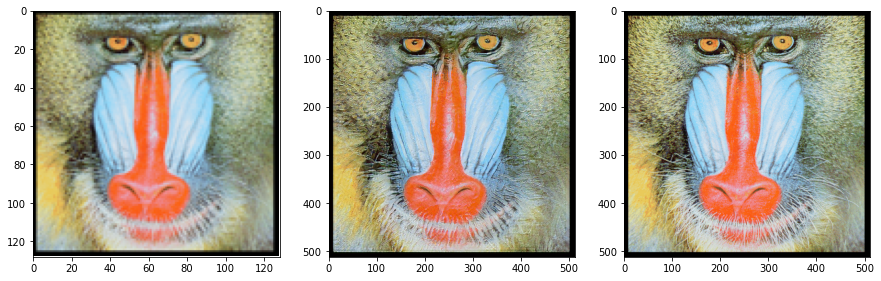

In [7]:
# placeholder code for displaying an image from generator
with torch.no_grad():
    img_lr = datahandler.get_sample_by_name('baboon', 128)
    img_hr = datahandler.get_sample_by_name('baboon', 512)
    fig, ax = plt.subplots(1, 3, figsize=(15,15))
    display_image(ax[0], img_lr)
    display_image(ax[1], generator.forward(torch.unsqueeze(img_lr.cuda().detach(), 0))[-1].cpu(), reverse_normalization=True)
    display_image(ax[2], img_hr)